In [1]:
!pip install scikit-learn
!

## Modules (Collections of database)

In [22]:
#Data Vizualizations
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

#Machine Learning Library
from sklearn.datasets import make_blobs # function to generate aleatory dataset
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import sklearn

#Math and Linear Algebra
import numpy as np
from math import sqrt
#Create DataFrames
import pandas as pd
## Séries históricas disponíveis em
## http://www.b3.com.br/pt_br/market-data-e-indices/servicos-de-dados/market-data/historico/mercado-a-vista/series-historicas/
arquivo_bovespa = (r'datasets\COTAHIST_M102022.txt')


## Estrutura do arquivo disponível em 
## http://www.b3.com.br/data/files/33/67/B9/50/D84057102C784E47AC094EA8/SeriesHistoricas_Layout.pdf
tamanho_campos=[2,8,2,12,3,12,10,3,4,13,13,13,13,13,13,13,5,18,18,13,1,8,7,13,12,3]

dados_acoes=pd.read_fwf(arquivo_bovespa, widths=tamanho_campos, header=0)
dados_acoes

00  COTAHIST    .2  022BOVESPA 2  022          1031  Unnamed: 6  \
0        1  20221003   2.0         ELMD3   10   ELETROMIDIA  ON      NM   
1        1  20221003   2.0         OFSA3   10  OUROFINO S/A  ON      NM   
2        1  20221003   2.0         SMFT3   10     SMART FIT  ON      NM   
3        1  20221003   2.0        HOME34   10    HOME DEPOT         DRN   
4        1  20221003   2.0         BRGE3   10  ALFA CONSORC          ON   
...     ..       ...   ...           ...  ...           ...         ...   
181802   1  20221019  78.0       ITSAI99   70          ITSA  PN      N1   
181803   1  20221021  78.0       ITSAI99   70          ITSA  PN      N1   
181804   1  20221024  78.0       ITSAI99   70          ITSA  PN      N1   
181805   1  20221025  78.0       ITSAI99   70          ITSA  PN      N1   
181806  99  COTAHIST   0.2  022BOVESPA 2   22  103100000181         808   

        Unnamed: 7 Unnamed: 8  Unnamed: 9  ...  Unnamed: 16  Unnamed: 17  \
0              NaN         R$      1080.0  ...        680.0     216300.0   
1              NaN         R$      2317.0  ...         37.0       7300.0   
2              NaN         R$      1568.0  ...       8482.0    1950600.0   
3              NaN         R$      5253.0  ...        494.0      27860.0   
4              NaN         R$       995.0  ...          2.0        200.0   
...            ...        ...         ...  ...          ...          ...   
181802         0.0         R$       243.0  ...          3.0       1500.0   
181803         0.0         R$       268.0  ...          1.0        500.0   
181804         0.0         R$       259.0  ...          1.0       1000.0   
181805         0.0         R$       255.0  ...          4.0       1100.0   
181806         NaN        NaN         NaN  ...          NaN          NaN   

         Unnamed: 18  Unnamed: 19  Unnamed: 20  Unnamed: 21  Unnamed: 22  \
0       2.469914e+08          0.0          0.0   99991231.0          1.0   
1       1.664580e+07          0.0          0.0   99991231.0          1.0   
2       3.148693e+09          0.0          0.0   99991231.0          1.0   
3       1.467964e+08          0.0          0.0   99991231.0          1.0   
4       1.912000e+05          0.0          0.0   99991231.0          1.0   
...              ...          ...          ...          ...          ...   
181802  3.639000e+05        906.0          0.0   20230915.0          1.0   
181803  1.340000e+05        906.0          0.0   20230915.0          1.0   
181804  2.590000e+05        906.0          0.0   20230915.0          1.0   
181805  2.794000e+05        906.0          0.0   20230915.0          1.0   
181806           NaN          NaN          NaN          NaN          NaN   

        Unnamed: 23   Unnamed: 24  Unnamed: 25  
0               0.0  BRELMDACNOR3        100.0  
1               0.0  BROFSAACNOR7        114.0  
2               0.0  BRSMFTACNOR1        109.0  
3               0.0  BRHOMEBDR002        143.0  
4               0.0  BRBRGEACNOR6        203.0  
...             ...           ...          ...  
181802          0.0  BRITSAACNPR7        412.0  
181803          0.0  BRITSAACNPR7        412.0  
181804          0.0  BRITSAACNPR7        412.0  
181805          0.0  BRITSAACNPR7        412.0  
181806          NaN           NaN          NaN  

[181807 rows x 26 columns]

<blockquote>Those datas are from Bovespa, in October of the year 2022<blockquote>

In [23]:
#from google.colab import drive
#drive.mount('/content/drive')

## Pre-processing of data 

#### Stage 1 - Structuring

 

##### Appoint columns, delete last line and adapt valus with comma

In [24]:
## Nomear as colunas

dados_acoes.columns = [
"tipo_registro",
"data_pregao",
"cod_bdi",
"cod_negociacao",
"tipo_mercado",
"empresa",
"especificacao_papel",
"prazo_dias_merc_termo",
"moeda_referencia",
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"numero_negocios",
"quantidade_papeis_negociados",
"volume_total_negociado",
"preco_exercicio",
"ìndicador_correcao_precos",
"data_vencimento" ,
"fator_cotacao",
"preco_exercicio_pontos",
"codigo_isin",
"num_distribuicao_papel"]

# Eliminar a última linha
linha=len(dados_acoes["data_pregao"])
dados_acoes=dados_acoes.drop(linha-1)

# Ajustar valores com virgula (dividir os valores dessas colunas por 100)
listaVirgula=[
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"volume_total_negociado",
"preco_exercicio",
"preco_exercicio_pontos"
]

for coluna in listaVirgula:
    dados_acoes[coluna]=[i/100. for i in dados_acoes[coluna]]


##### Data types

In [25]:
## Informações das variáveis
dados_acoes.info()

## Corrigir tipos de dados
#dados_acoes["data_pregao"]  = pd.to_datetime(dados_acoes["data_pregao"],infer_datetime_format=True) #Transforma para o tipo datetime64
dados_acoes["cod_negociacao"] = dados_acoes["cod_negociacao"].astype('|S') #Transforma o objeto em string
#dados_acoes["empresa"] = dados_acoes["empresa"].astype('|S') #Transforma o objeto em string
dados_acoes["codigo_isin"] = dados_acoes["codigo_isin"].astype('|S') #Transforma o objeto em string


dados_acoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181806 entries, 0 to 181805
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   tipo_registro                 181806 non-null  int64  
 1   data_pregao                   181806 non-null  object 
 2   cod_bdi                       181806 non-null  float64
 3   cod_negociacao                181806 non-null  object 
 4   tipo_mercado                  181806 non-null  int64  
 5   empresa                       181806 non-null  object 
 6   especificacao_papel           181806 non-null  object 
 7   prazo_dias_merc_termo         148349 non-null  float64
 8   moeda_referencia              181806 non-null  object 
 9   preco_abertura                181806 non-null  float64
 10  preco_maximo                  181806 non-null  float64
 11  preco_minimo                  181806 non-null  float64
 12  preco_medio                   181806 non-nul

#### Stage 2 - Remove Missing Data

In [26]:
#Identificar dados faltantes
dados_acoes.isnull().sum()

tipo_registro                       0
data_pregao                         0
cod_bdi                             0
cod_negociacao                      0
tipo_mercado                        0
empresa                             0
especificacao_papel                 0
prazo_dias_merc_termo           33457
moeda_referencia                    0
preco_abertura                      0
preco_maximo                        0
preco_minimo                        0
preco_medio                         0
preco_ultimo_negocio                0
preco_melhor_oferta_compra          0
preco_melhor_oferta_venda           0
numero_negocios                     0
quantidade_papeis_negociados        0
volume_total_negociado              0
preco_exercicio                     0
ìndicador_correcao_precos           0
data_vencimento                     0
fator_cotacao                       0
preco_exercicio_pontos              0
codigo_isin                         0
num_distribuicao_papel              0
dtype: int64

In [27]:
## Remover dados faltantes
dados_acoes = dados_acoes.dropna(axis=1)
dados_acoes.isnull().sum()

tipo_registro                   0
data_pregao                     0
cod_bdi                         0
cod_negociacao                  0
tipo_mercado                    0
empresa                         0
especificacao_papel             0
moeda_referencia                0
preco_abertura                  0
preco_maximo                    0
preco_minimo                    0
preco_medio                     0
preco_ultimo_negocio            0
preco_melhor_oferta_compra      0
preco_melhor_oferta_venda       0
numero_negocios                 0
quantidade_papeis_negociados    0
volume_total_negociado          0
preco_exercicio                 0
ìndicador_correcao_precos       0
data_vencimento                 0
fator_cotacao                   0
preco_exercicio_pontos          0
codigo_isin                     0
num_distribuicao_papel          0
dtype: int64

##### Representação Gráfica e Análise Descritiva

###### Anlysis of column "Indicadores de Correção de Preços"

{'mode': 0    0.0
Name: ìndicador_correcao_precos, dtype: float64, 'mean': 0.0, 'meadian': 0.0}


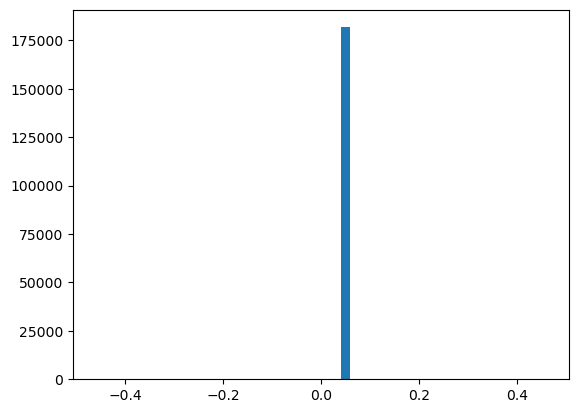

In [28]:
# Parecem haver dados ruidosos aqui
plt.hist(x = dados_acoes["ìndicador_correcao_precos"], rwidth = 0.2)
indicador_correcao_precos = {
    "mode" : dados_acoes["ìndicador_correcao_precos"].mode() ,
    "mean" : dados_acoes["ìndicador_correcao_precos"].mean() ,
    "meadian" : dados_acoes["ìndicador_correcao_precos"].median()
}
# Essa coluna não revela nada relevante
print(indicador_correcao_precos)
#Remoção da coluna dados_acoes["ìndicador_correcao_precos"]
dados_acoes = dados_acoes.drop(["ìndicador_correcao_precos"], axis = "columns")

###### Analysis of column "preco_exercicio_pontos"

{'mode': 0    0.0
Name: preco_exercicio_pontos, dtype: float64, 'mean': 16459467.784341551, 'meadian': 0.0}


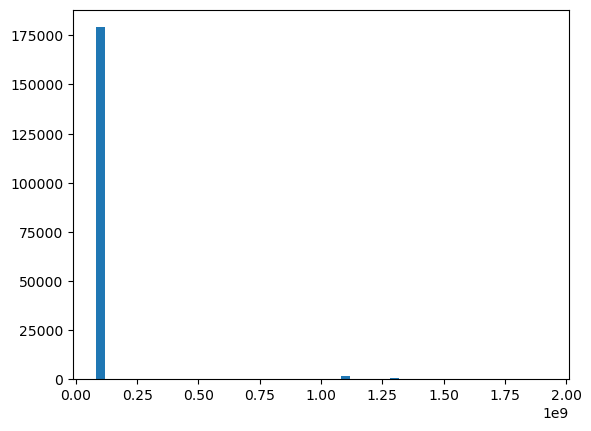

In [29]:
# Parecem haver dados ruidosos aqui
plt.hist(x = dados_acoes["preco_exercicio_pontos"], rwidth = 0.2)
preco_exercicio_pontos = {
    "mode" : dados_acoes["preco_exercicio_pontos"].mode() ,
    "mean" : dados_acoes["preco_exercicio_pontos"].mean() ,
    "meadian" : dados_acoes["preco_exercicio_pontos"].median()
}
# Essa coluna não revela nada relevante
print(preco_exercicio_pontos)
# Remoção da coluna
dados_acoes = dados_acoes.drop(["preco_exercicio_pontos"], axis = "columns")

In [30]:
dados_acoes = dados_acoes.sort_values(by=['data_pregao'])
dados_acoes

tipo_registro data_pregao  cod_bdi cod_negociacao  tipo_mercado  \
0                   1    20221003      2.0       b'ELMD3'            10   
158385              1    20221003     82.0    b'VALEW731'            80   
54388               1    20221003     78.0    b'BPACL266'            70   
158374              1    20221003     82.0    b'VALEN780'            80   
103762              1    20221003     82.0    b'NTCOW178'            80   
...               ...         ...      ...            ...           ...   
58580               1    20221031     78.0    b'EGIEL418'            70   
155990              1    20221031     78.0     b'VALEA92'            70   
173714              1    20221031     78.0    b'BOVVK120'            70   
41283               1    20221031     82.0    b'BBASX278'            80   
37134               1    20221031     82.0    b'AMERX125'            80   

            empresa especificacao_papel moeda_referencia  preco_abertura  \
0       ELETROMIDIA          ON      NM               R$           10.80   
158385    VALEE  FM          ON      NM               R$            2.90   
54388          BPAC          UNT     N2               R$            1.90   
158374        VALEE          ON      NM               R$            6.00   
103762        NTCOE          ON      NM               R$            3.25   
...             ...                 ...              ...             ...   
58580         EGIEE          ON      NM               R$            0.77   
155990         VALE          ON      NM               R$            4.22   
173714     BOVV  FM                  CI               R$            1.03   
41283         BBASE          ON      NM               R$            0.70   
37134         AMERE          ON      NM               R$            0.38   

        preco_maximo  ...  preco_melhor_oferta_compra  \
0              11.73  ...                       11.40   
158385          2.90  ...                        1.30   
54388           1.95  ...                        0.00   
158374          6.00  ...                        0.00   
103762          3.30  ...                        2.92   
...              ...  ...                         ...   
58580           1.19  ...                        0.00   
155990          5.02  ...                        0.00   
173714          1.03  ...                        0.00   
41283           0.70  ...                        0.30   
37134           0.40  ...                        0.01   

        preco_melhor_oferta_venda  numero_negocios  \
0                           11.44            680.0   
158385                       2.85             41.0   
54388                        0.00              2.0   
158374                       0.00              1.0   
103762                       0.00              5.0   
...                           ...              ...   
58580                        0.00              6.0   
155990                       0.00            153.0   
173714                       0.00              1.0   
41283                        0.88              1.0   
37134                        0.33              7.0   

        quantidade_papeis_negociados  volume_total_negociado  preco_exercicio  \
0                           216300.0               2469914.0             0.00   
158385                      110300.0                237538.0            69.84   
54388                         1500.0                  2900.0            26.60   
158374                         500.0                  3000.0            74.66   
103762                       21700.0                 70780.0            17.87   
...                              ...                     ...              ...   
58580                         4600.0                  3724.0            41.09   
155990                       32200.0                135846.0            70.41   
173714                           0.0                     1.0           120.00   
41283                          200.0              

#### > Those columns won't be usefull for data analysis, that's why we'll be removing it from the dataset

In [31]:
dados_acoes.drop(["moeda_referencia"], axis=1, inplace=True)
dados_acoes.drop(["fator_cotacao"], axis=1, inplace=True)

#### > Narrow the data by company

In [32]:
x = dados_acoes["empresa"].value_counts()

In [33]:
x[1:15]

VALEE        6220
PETR         4858
BBASE        3892
MGLUE        3198
BOVAE        2973
VALE         2305
COGNE        2023
VIIAE        1942
MGLU         1900
BBAS         1740
ABEVE        1655
CSNAE        1640
IBOVE  FM    1608
USIME        1534
Name: empresa, dtype: int64

##### >> In this case: PETRE

In [34]:
empresa_1 = dados_acoes[dados_acoes["empresa"] == "PETRE"]

## Como estão centrados os preços dos últimos negocios da PETRE?

#### Primeiro os dados dos preços do últimos negócios serão alocados para um objeto Series unidimensional 

In [35]:
PETRE = empresa_1["preco_ultimo_negocio"]
PETRE_arr = np.array(PETRE)
type(PETRE)
type(PETRE_arr)

#Ordenar preço dos últimos negócios da PETRE
PETRE_arr.sort()
print(PETRE_arr)

[1.000e-02 1.000e-02 1.000e-02 ... 4.877e+01 4.927e+01 4.977e+01]


In [36]:
PETRE.describe()

count    10027.000000
mean         4.105726
std          5.729424
min          0.010000
25%          0.240000
50%          1.700000
75%          5.750000
max         49.770000
Name: preco_ultimo_negocio, dtype: float64

#### O dicionário "central_tendency_measures" contém dados das medidas de tendência central do Series em questão

In [37]:

central_tendency_measures = {
    "mean": PETRE.mean(),
    "mode": PETRE.mode(dropna = True),
    "median": PETRE.median(), 
    "max": PETRE.max(),
    "min": PETRE.min(),
}
pd.Series(central_tendency_measures)

mean                                               4.105726
mode      0    0.01
Name: preco_ultimo_negocio, dtype: f...
median                                                  1.7
max                                                   49.77
min                                                    0.01
dtype: object

## How PETRE's actions are distributed


#### Variability Measures
Is there any uniformity between the measures that was found?

In [38]:
'''
# output: [ 1  1  0  4 -5]
variability_measures = {
    "variance" : PETRE.var(),
    "standard deviation": PETRE.std(),
    "shifiting_range" : np.unique(shifting.shifting_range(PETRE_arr)),
    "CV" : variation(PETRE)
}
pd.Series(variability_measures)
'''

'\n# output: [ 1  1  0  4 -5]\nvariability_measures = {\n    "variance" : PETRE.var(),\n    "standard deviation": PETRE.std(),\n    "shifiting_range" : np.unique(shifting.shifting_range(PETRE_arr)),\n    "CV" : variation(PETRE)\n}\npd.Series(variability_measures)\n'

#### A média está centralizada?


In [39]:
#Criar um gráfico que
    #Exibe a diferença entre o coeficiente de variação, a média e o desvio padrão
    

# - Inicial Exploration
##  Analysis of the company "Petrobrás" in October

### > Last traded price (Preço de último negócio)

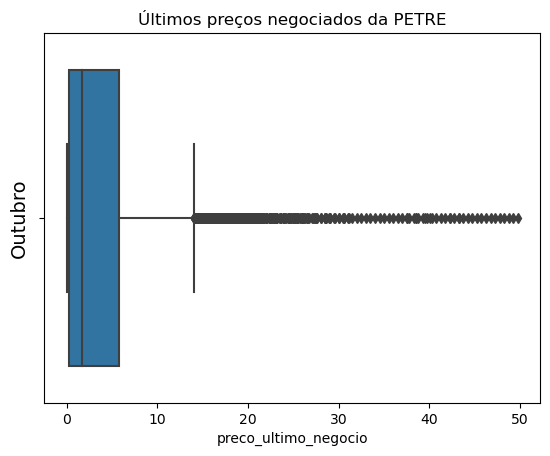

In [40]:
boxplot_empresa1_precoultimo_plt = sns.boxplot(x=empresa_1["preco_ultimo_negocio"]) # colocando o boxplot numa variável para manipular melhor
boxplot_empresa1_precoultimo_plt.set_ylabel('Outubro', fontsize=14) # Aqui você renomeia o eixo que deseja e o tamanho da fonte

boxplot_empresa1_precoultimo_plt.plot() # Aqui é como se o gráfico fosse ocultado até ser usado plt.show()

# em R$ - Reais
plt.title('Últimos preços negociados da PETRE') # O título que se deseja colocar acima do gráfico

plt.show() # Impressão do gráfico

### > Total trading volume (Volume total negociado)

In [41]:
empresa_1["volume_total_negociado"].std()

6105593.487115129

In [42]:
empresa_1["volume_total_negociado"].mean()

710625.8090156578

In [43]:
empresa_1["volume_total_negociado"].median()

38973.0

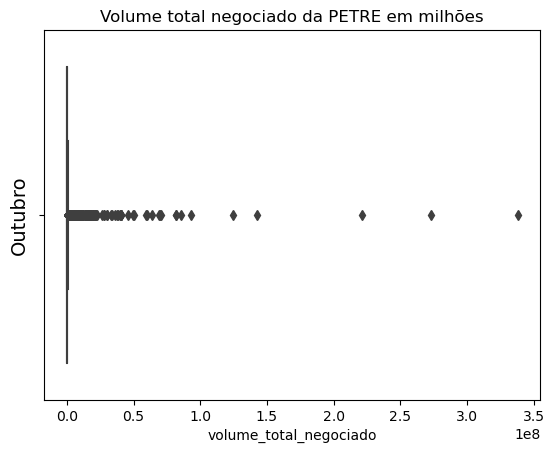

In [44]:
boxplot_empresa1_volumetotal_plt = sns.boxplot(x=empresa_1["volume_total_negociado"])
boxplot_empresa1_volumetotal_plt.set_ylabel('Outubro', fontsize=14)

boxplot_empresa1_volumetotal_plt.plot()


plt.title('Volume total negociado da PETRE em milhões')

plt.show()

### > Number of Trades (Número de negócios)

In [45]:
empresa_1["numero_negocios"].std()

384.4783561749801

In [46]:
empresa_1["numero_negocios"].mean()

124.9536252119278

In [47]:
empresa_1["numero_negocios"].median()

13.0

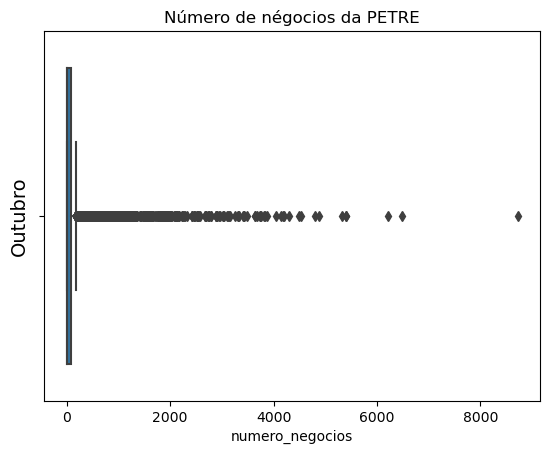

In [48]:
boxplot_empresa1_numeronegocios_plt = sns.boxplot(x=empresa_1["numero_negocios"])
boxplot_empresa1_numeronegocios_plt.set_ylabel('Outubro', fontsize=14)

boxplot_empresa1_numeronegocios_plt.plot()


plt.title('Número de négocios da PETRE')

plt.show()

### > Maximum Closing Prices (Preço máximo das ações)

In [49]:
empresa_1["preco_maximo"].std()

5.776885233995995

In [50]:
empresa_1["preco_maximo"].mean()

4.266220205445269

In [51]:
empresa_1["preco_maximo"].median()

1.9

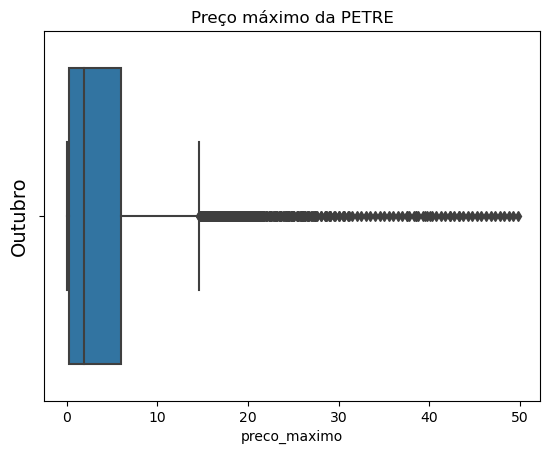

In [52]:
boxplot_empresa1_maximo_plt = sns.boxplot(x = empresa_1["preco_maximo"])
boxplot_empresa1_maximo_plt.set_ylabel('Outubro', fontsize=14)

boxplot_empresa1_maximo_plt.plot()


plt.title('Preço máximo da PETRE') # em R$ - Reais

plt.show()

### > Minimum Closing Prices (Preço mínimo das ações)

In [53]:
empresa_1["preco_minimo"].std()

5.66094762431851

In [54]:
empresa_1["preco_minimo"].mean()

3.928716465543013

In [55]:
empresa_1["preco_minimo"].median()

1.5

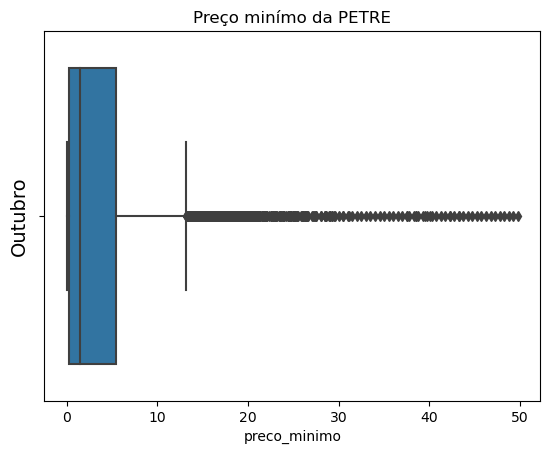

In [56]:
boxplot_empresa1_minimo_plt = sns.boxplot(x = empresa_1["preco_minimo"])
boxplot_empresa1_minimo_plt.set_ylabel('Outubro', fontsize=14)

boxplot_empresa1_minimo_plt.plot()


plt.title('Preço minímo da PETRE') # em R$ - Reais

plt.show()

### > Stock Opening Price (Preço de abertura das ações)

In [57]:
empresa_1["preco_abertura"].mean()

4.09339283933376

In [58]:
empresa_1["preco_abertura"].std()

5.707135405067777

In [59]:
empresa_1["preco_abertura"].median()

1.71

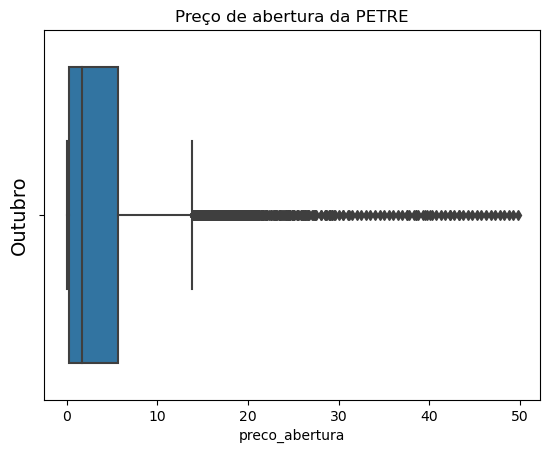

In [60]:
boxplot_empresa1_abertura_plt = sns.boxplot(x = empresa_1["preco_abertura"])
boxplot_empresa1_abertura_plt.set_ylabel('Outubro', fontsize=14)

boxplot_empresa1_abertura_plt.plot()


plt.title('Preço de abertura da PETRE') # em R$ - Reais

plt.show()

### >> Table with some correlations

In [61]:
empresa_1[["preco_abertura", "preco_ultimo_negocio","preco_minimo","preco_maximo","numero_negocios","volume_total_negociado"]].corr()

preco_abertura  preco_ultimo_negocio  preco_minimo  \
preco_abertura                1.000000              0.997253      0.998526   
preco_ultimo_negocio          0.997253              1.000000      0.998425   
preco_minimo                  0.998526              0.998425      1.000000   
preco_maximo                  0.998428              0.998670      0.997138   
numero_negocios              -0.109370             -0.111930     -0.119470   
volume_total_negociado        0.207455              0.206519      0.207331   

                        preco_maximo  numero_negocios  volume_total_negociado  
preco_abertura              0.998428        -0.109370                0.207455  
preco_ultimo_negocio        0.998670        -0.111930                0.206519  
preco_minimo                0.997138        -0.119470                0.207331  
preco_maximo                1.000000        -0.102856                0.206406  
numero_negocios            -0.102856         1.000000                0.146719  
volume_total_negociado      0.206406         0.146719                1.000000

# Data Visualization

### - Scatter Plot

<AxesSubplot:xlabel='preco_abertura', ylabel='preco_ultimo_negocio'>

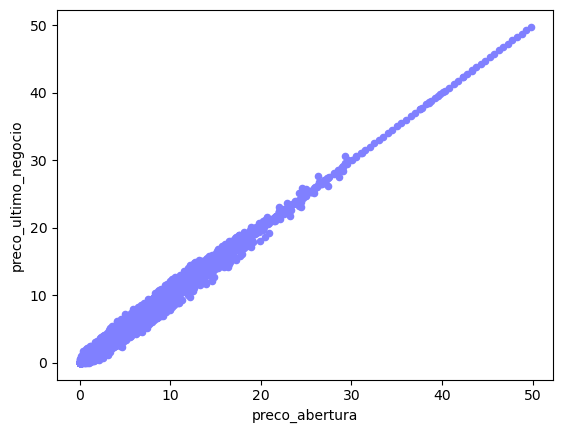

In [62]:
color=np.array([0.5, 0.5, 1]).reshape(1,-1)
empresa_1.plot.scatter(x="preco_abertura",y="preco_ultimo_negocio", c=color)

<AxesSubplot:xlabel='numero_negocios', ylabel='volume_total_negociado'>

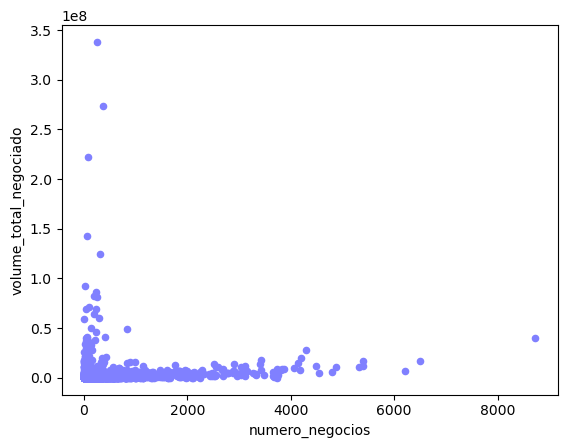

In [63]:
empresa_1.plot.scatter(x="numero_negocios",y="volume_total_negociado",c=color)

<AxesSubplot:xlabel='preco_minimo', ylabel='preco_maximo'>

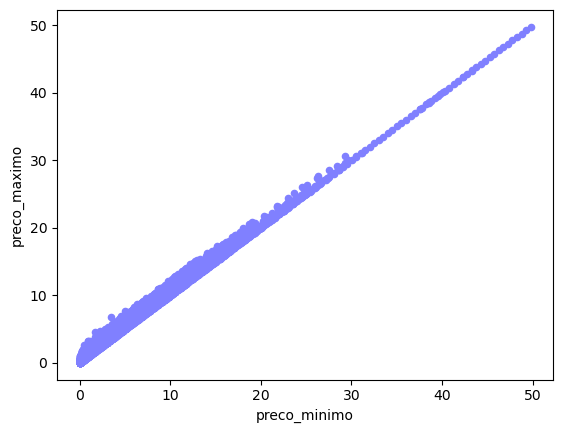

In [64]:
empresa_1.plot.scatter(x="preco_minimo",y="preco_maximo",c=color)

<AxesSubplot:xlabel='numero_negocios', ylabel='preco_ultimo_negocio'>

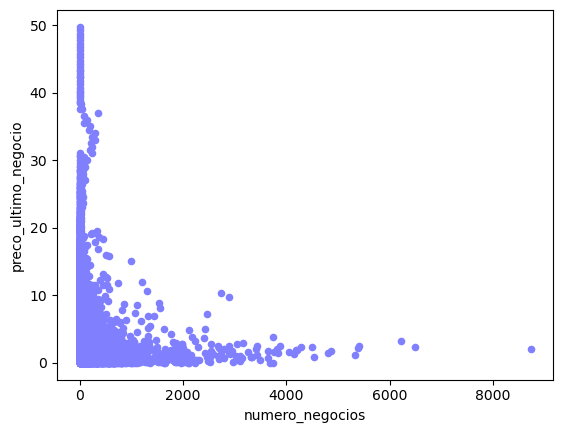

In [65]:
empresa_1.plot.scatter(x="numero_negocios",y="preco_ultimo_negocio",c=color)

<AxesSubplot:xlabel='volume_total_negociado', ylabel='preco_ultimo_negocio'>

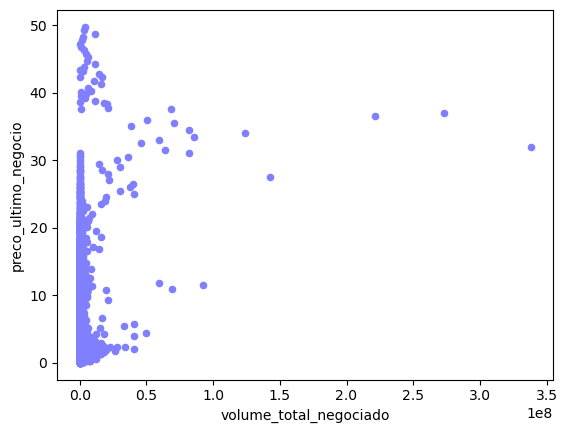

In [66]:
empresa_1.plot.scatter(x="volume_total_negociado",y="preco_ultimo_negocio",c=color)

In [67]:
#Using seaborn
sns.set_palette('Set1')

###### > Creating others dataframes of some companies from the main dataframe and then concatenating them.

In [68]:
empresa_2 = dados_acoes[dados_acoes["empresa"] == "VALEE"]
empresa_3 = dados_acoes[dados_acoes["empresa"] == "BBASE"]
empresa_4 = dados_acoes[dados_acoes["empresa"] == "MGLUE"]
empresa_5 = dados_acoes[dados_acoes["empresa"] == "COGNE"]

In [69]:
empresas = pd.concat([empresa_1, empresa_2, empresa_3, empresa_4, empresa_5])

In [70]:
empresas

tipo_registro data_pregao  cod_bdi cod_negociacao  tipo_mercado  \
103684              1    20221003     82.0    b'PETRW387'            80   
104371              1    20221003     78.0    b'PETRA257'            70   
104414              1    20221003     82.0    b'PETRX171'            80   
104429              1    20221003     82.0    b'PETRX229'            80   
104026              1    20221003     82.0    b'PETRW412'            80   
...               ...         ...      ...            ...           ...   
57287               1    20221031     82.0    b'COGNM365'            80   
57290               1    20221031     82.0    b'COGNV400'            80   
57298               1    20221031     82.0    b'COGNW415'            80   
173792              1    20221031     82.0    b'COGNM300'            80   
173723              1    20221031     78.0    b'COGNL315'            70   

       empresa especificacao_papel  preco_abertura  preco_maximo  \
103684   PETRE          PN      N2            9.36          9.66   
104371   PETRE          PN      N2            2.25          2.25   
104414   PETRE          PN      N2            1.45          1.48   
104429   PETRE          PN      N2            0.08          0.08   
104026   PETRE          PN      N2            8.42          9.44   
...        ...                 ...             ...           ...   
57287    COGNE          ON      NM            0.46          0.46   
57290    COGNE          ON      NM            0.97          0.97   
57298    COGNE          ON      NM            0.80          0.80   
173792   COGNE          ON      NM            0.14          0.17   
173723   COGNE          ON      NM            0.38          0.49   

        preco_minimo  ...  preco_ultimo_negocio  preco_melhor_oferta_compra  \
103684          9.36  ...                  9.66                        0.00   
104371          2.25  ...                  2.25                        1.60   
104414          1.35  ...                  1.40                        1.21   
104429          0.08  ...                  0.08                        0.03   
104026          8.42  ...                  9.44                        0.00   
...              ...  ...                   ...                         ...   
57287           0.46  ...                  0.46                        0.00   
57290           0.97  ...                  0.97                        0.00   
57298           0.80  ...                  0.80                        0.50   
173792          0.14  ...                  0.17                        0.17   
173723          0.29  ...                  0.35                        0.27   

        preco_melhor_oferta_venda  numero_negocios  \
103684                       0.00              2.0   
104371                       0.00              1.0   
104414                       2.96              5.0   
104429                       0.00              1.0   
104026                       0.00              2.0   
...                           ...              ...   
57287                        0.00              1.0   
57290                        0.97              1.0   
57298                        0.00              1.0   
173792                       0.00              2.0   
173723                       0.41             23.0   

        quantidade_papeis_negociados  volume_total_negociado  preco_exercicio  \
103684                        7000.0                 66570.0            42.02   
104371                         500.0                  1125.0            34.02   
104414                        1100.0                  1535.0            29.27   
104429                        1000.0                    80.0            19.02   
104026                        3600.0                 33882.0            41.77   
...                              ...                     ...              ...   
57287                        10000.0                  4600.0             3.65   
57290                         3000.0        

Text(0.5, 1.0, 'MONITORAMENTO DA QUANTIDADE DE NEGÓCIOS DURANTE O MÊS DE OUTUBRO 2022  (Por Dia Útil)')

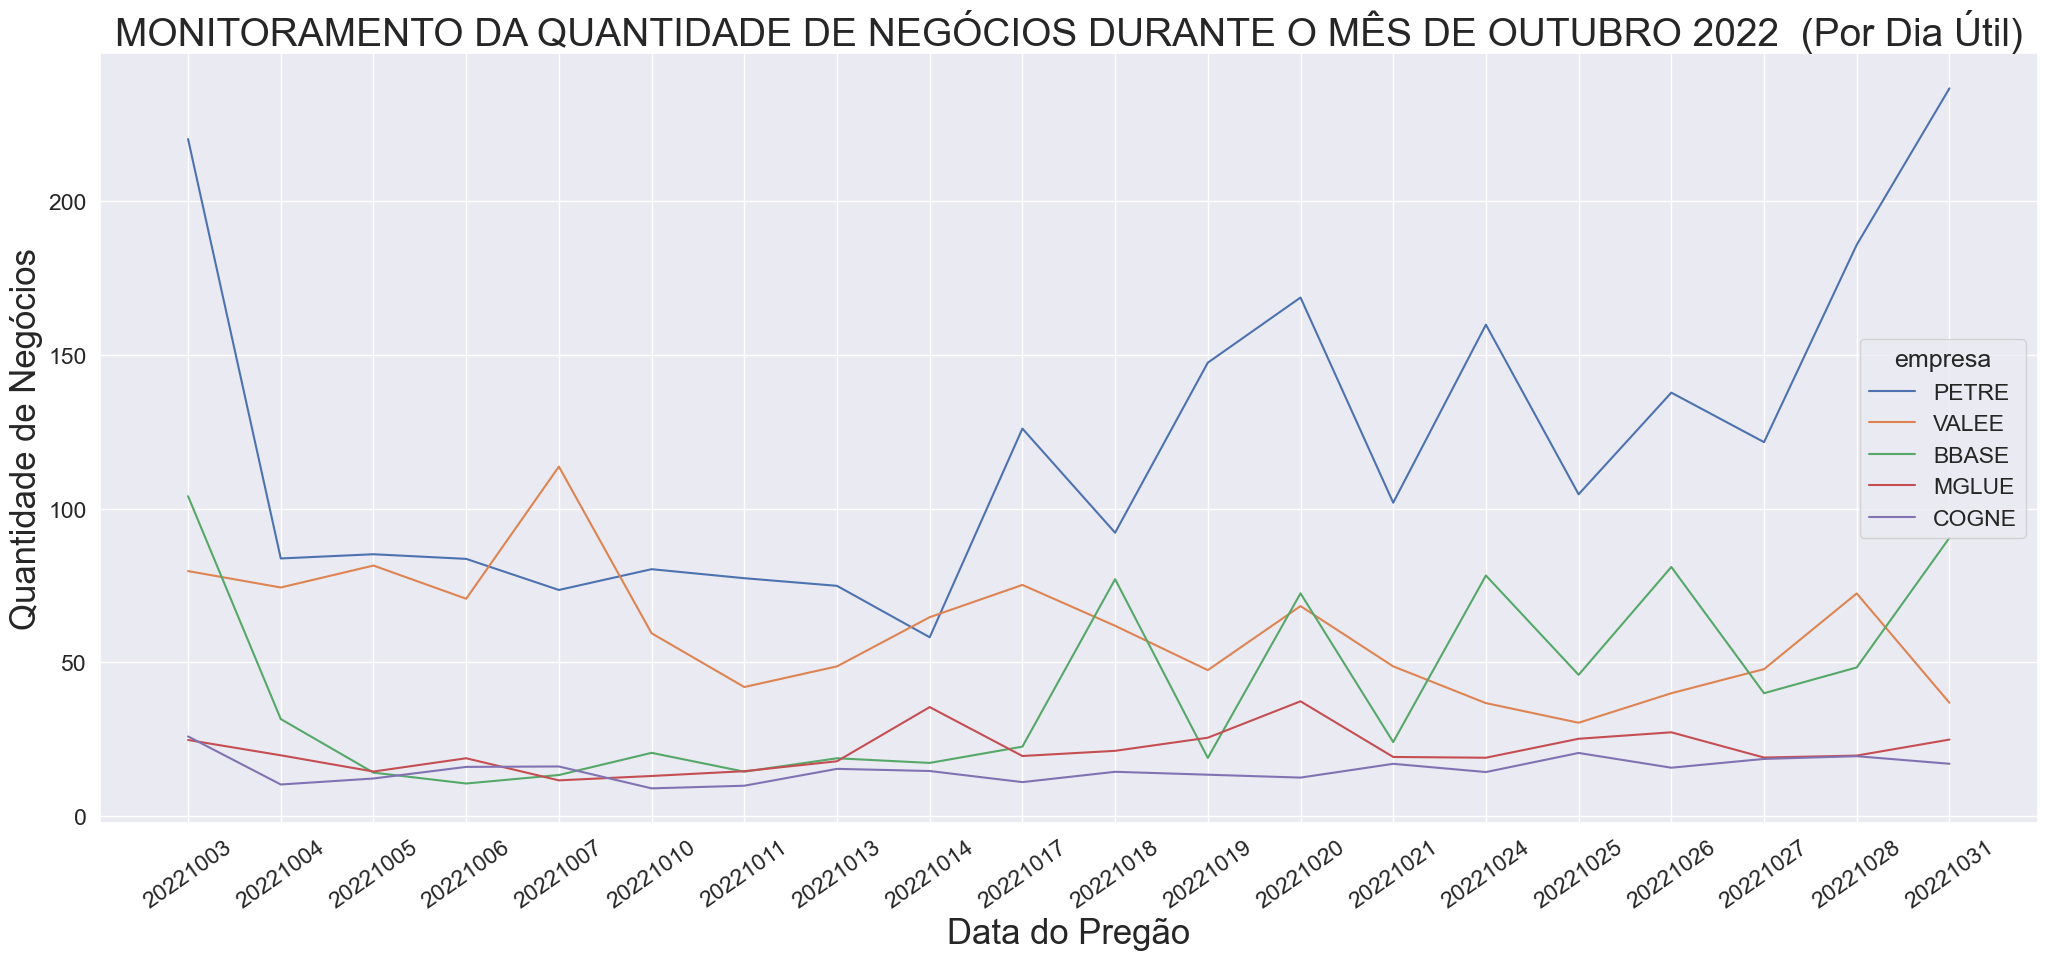

In [71]:
plt.figure(figsize=(25,10))
sns.set(font_scale=1.5)
plt.xticks(rotation=35)
sns.lineplot(data=empresas, x="data_pregao", y="numero_negocios", hue="empresa", err_style=None)

plt.xlabel('Data do Pregão', fontsize = 25)
plt.ylabel('Quantidade de Negócios',fontsize = 25)
plt.title("MONITORAMENTO DA QUANTIDADE DE NEGÓCIOS DURANTE O MÊS DE OUTUBRO 2022  (Por Dia Útil)", fontsize = 28)


# Lembrando que 202210 -> mes de outubro em 2022

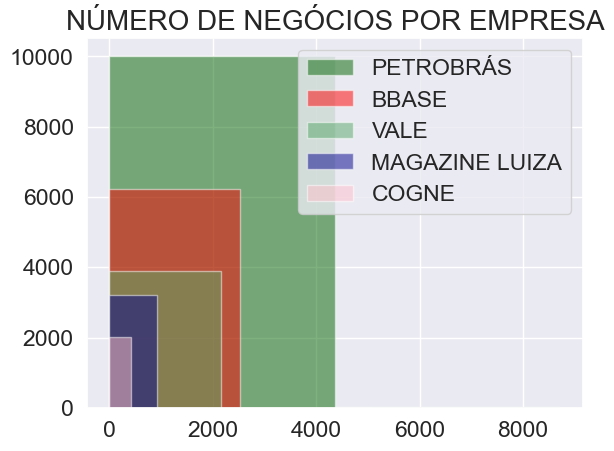

In [72]:
plt.hist(empresa_1['numero_negocios'], alpha=0.5, label='PETROBRÁS', bins=2, color='darkgreen')
plt.hist(empresa_2['numero_negocios'], alpha=0.5, label='BBASE', bins=2, color='red')
plt.hist(empresa_3['numero_negocios'], alpha=0.5, label='VALE', bins=2, color='g')
plt.hist(empresa_4['numero_negocios'], alpha=0.5, label='MAGAZINE LUIZA', bins=2, color='darkblue')
plt.hist(empresa_5['numero_negocios'], alpha=0.5, label='COGNE', bins=2, color='pink')

plt.title("NÚMERO DE NEGÓCIOS POR EMPRESA", fontsize = 20)
plt.legend()
plt.rcParams['figure.figsize'] = (12, 9)

<AxesSubplot:xlabel='empresa', ylabel='numero_negocios'>

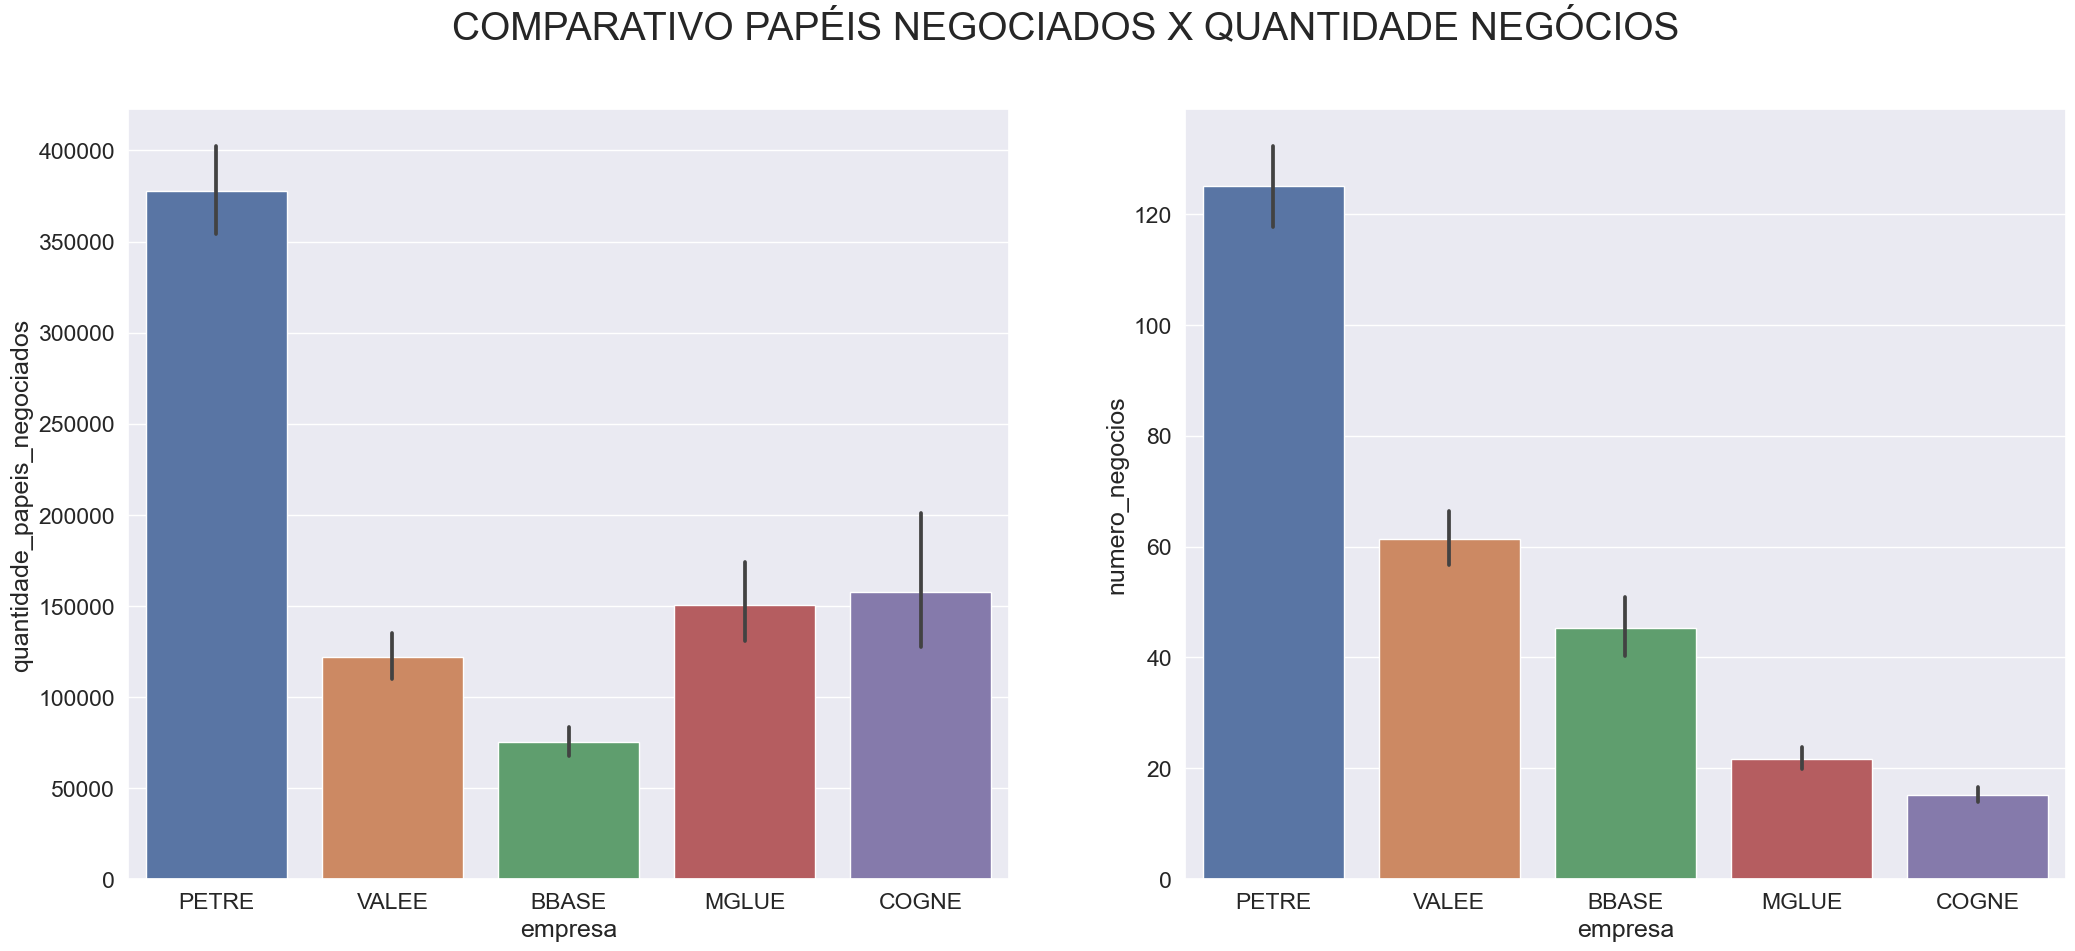

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(25, 10))
fig.suptitle("COMPARATIVO PAPÉIS NEGOCIADOS X QUANTIDADE NEGÓCIOS", fontsize = 28)
sns.barplot(ax=axes[0], data=empresas, x='empresa', y="quantidade_papeis_negociados")
sns.barplot(ax=axes[1], data=empresas, x='empresa', y='numero_negocios')


Text(0.5, 1.0, 'MONITORAMENTO DO PREÇO DOS NEGÓCIOS DURANTE O MÊS DE OUTUBRO 2022    (Por Dia Útil)')

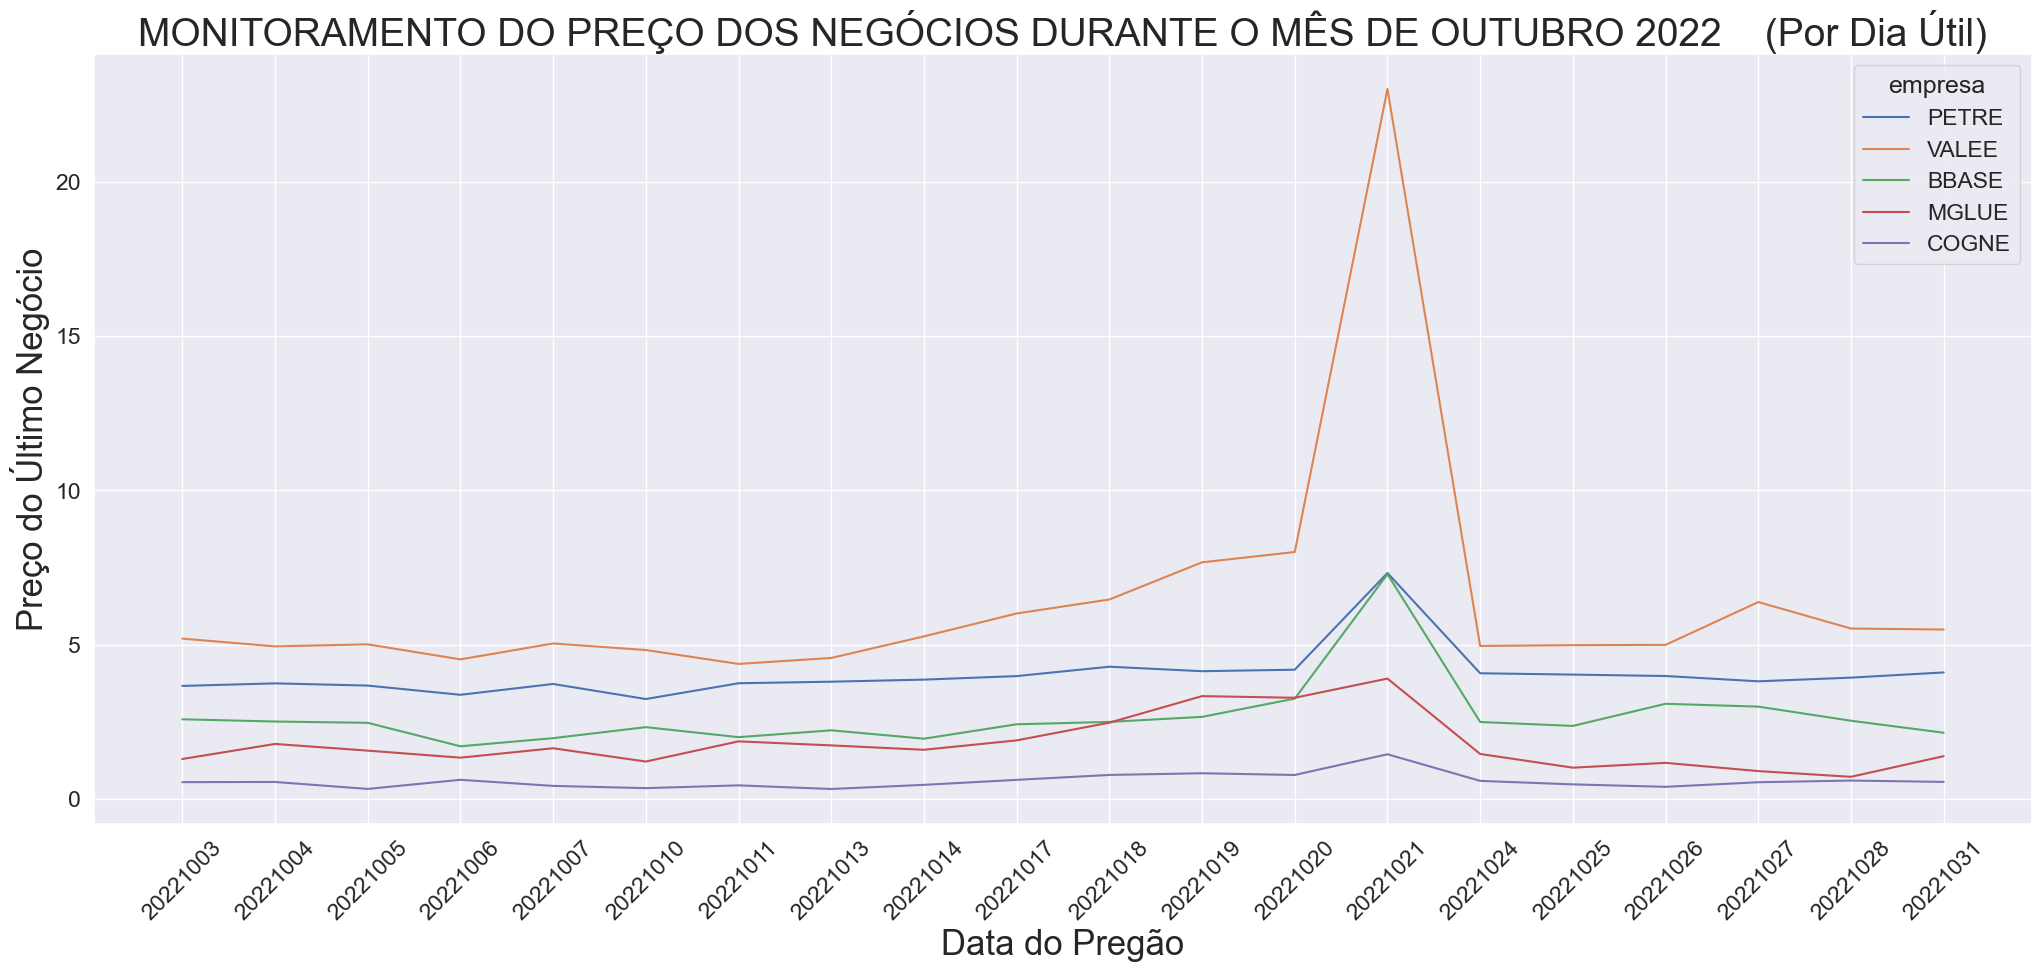

In [74]:
plt.figure(figsize=(25,10))
sns.set(font_scale=1.5)
plt.xticks(rotation=45)
sns.lineplot(data=empresas, x="data_pregao", y="preco_ultimo_negocio", hue="empresa", err_style=None)

plt.xlabel('Data do Pregão', fontsize = 25)
plt.ylabel('Preço do Último Negócio',fontsize = 25)
plt.title("MONITORAMENTO DO PREÇO DOS NEGÓCIOS DURANTE O MÊS DE OUTUBRO 2022    (Por Dia Útil)", fontsize = 28)

Text(0.5, 1.0, 'MONITORAMENTO DO PREÇO DOS NEGÓCIOS DURANTE O MÊS DE OUTUBRO 2022    (Por Dia Útil)')

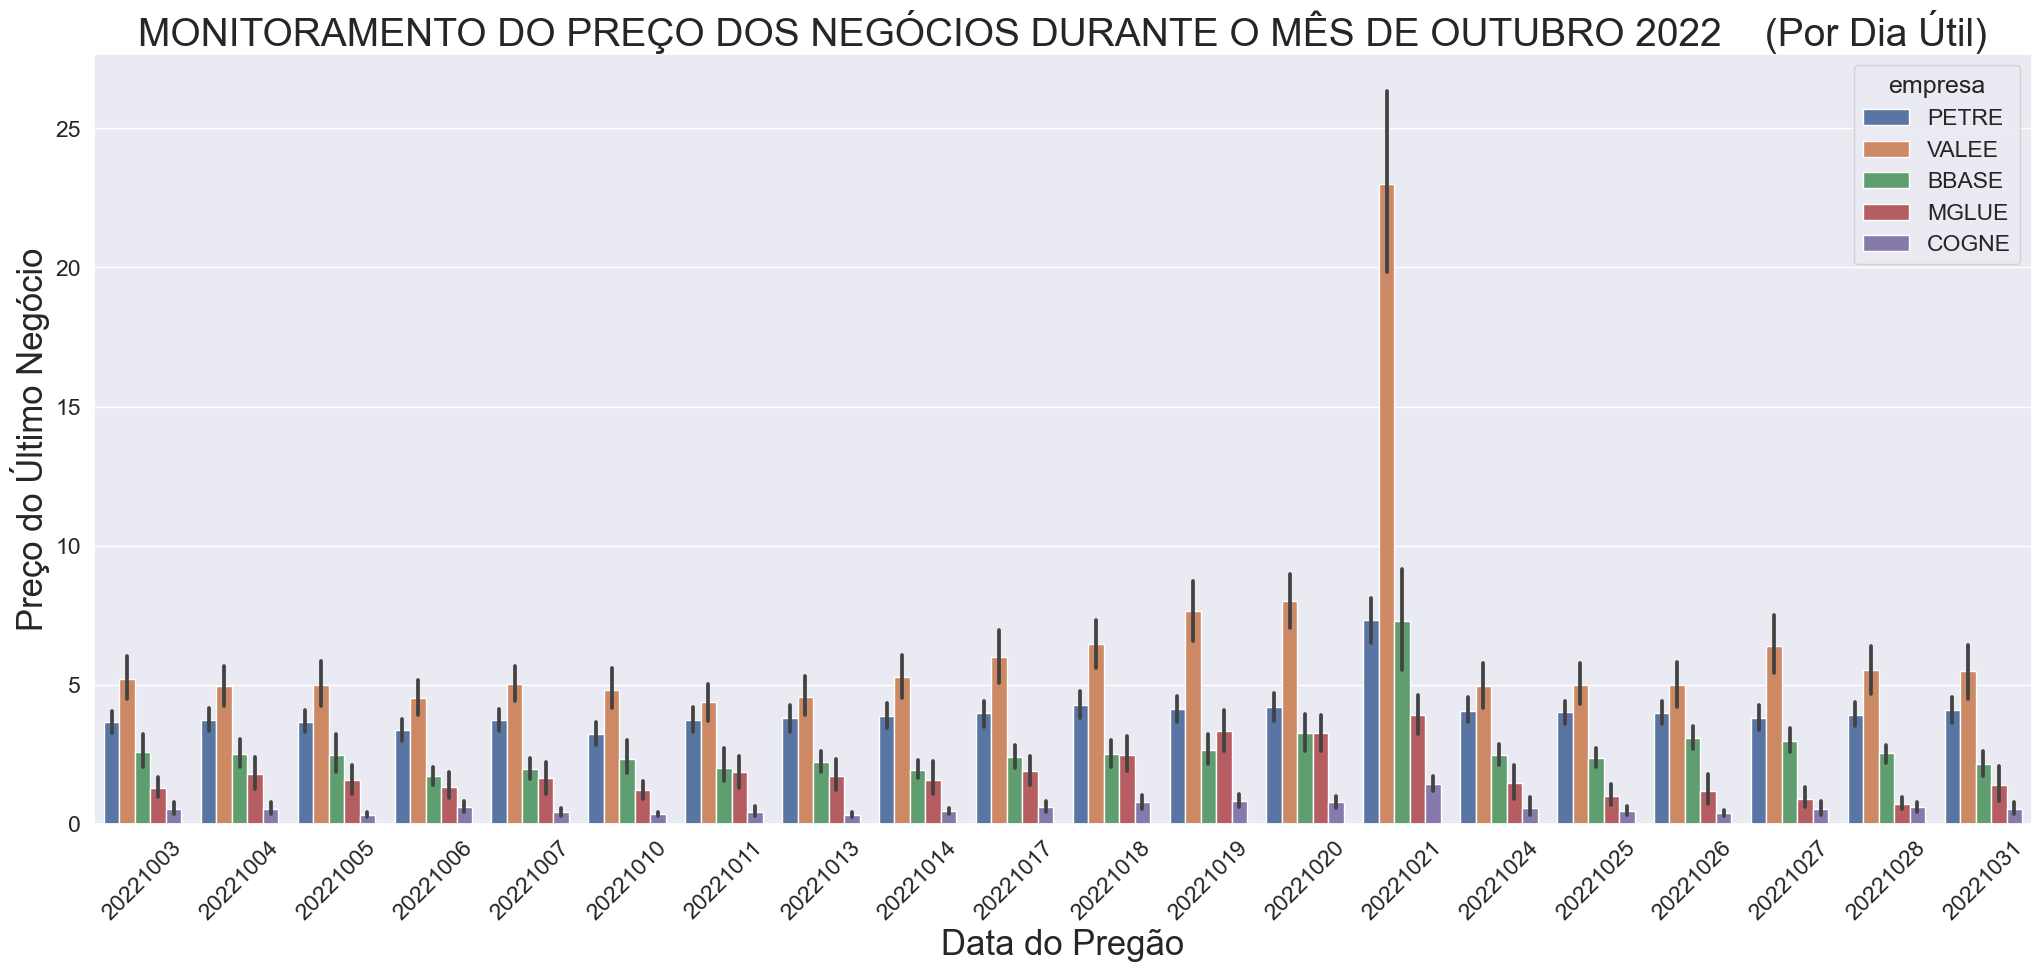

In [75]:
plt.figure(figsize=(25,10))
sns.set(font_scale=1.5)
plt.xticks(rotation=45)
sns.barplot(data=empresas, x="data_pregao", y="preco_ultimo_negocio", hue = "empresa")

plt.xlabel('Data do Pregão', fontsize = 25)
plt.ylabel('Preço do Último Negócio',fontsize = 25)
plt.title("MONITORAMENTO DO PREÇO DOS NEGÓCIOS DURANTE O MÊS DE OUTUBRO 2022    (Por Dia Útil)", fontsize = 28)

Text(0.5, 1.0, 'MONITORAMENTO DO VOLUME NEGOCIADO DURANTE O MÊS DE OUTUBRO 2022    (Por Dia Útil)')

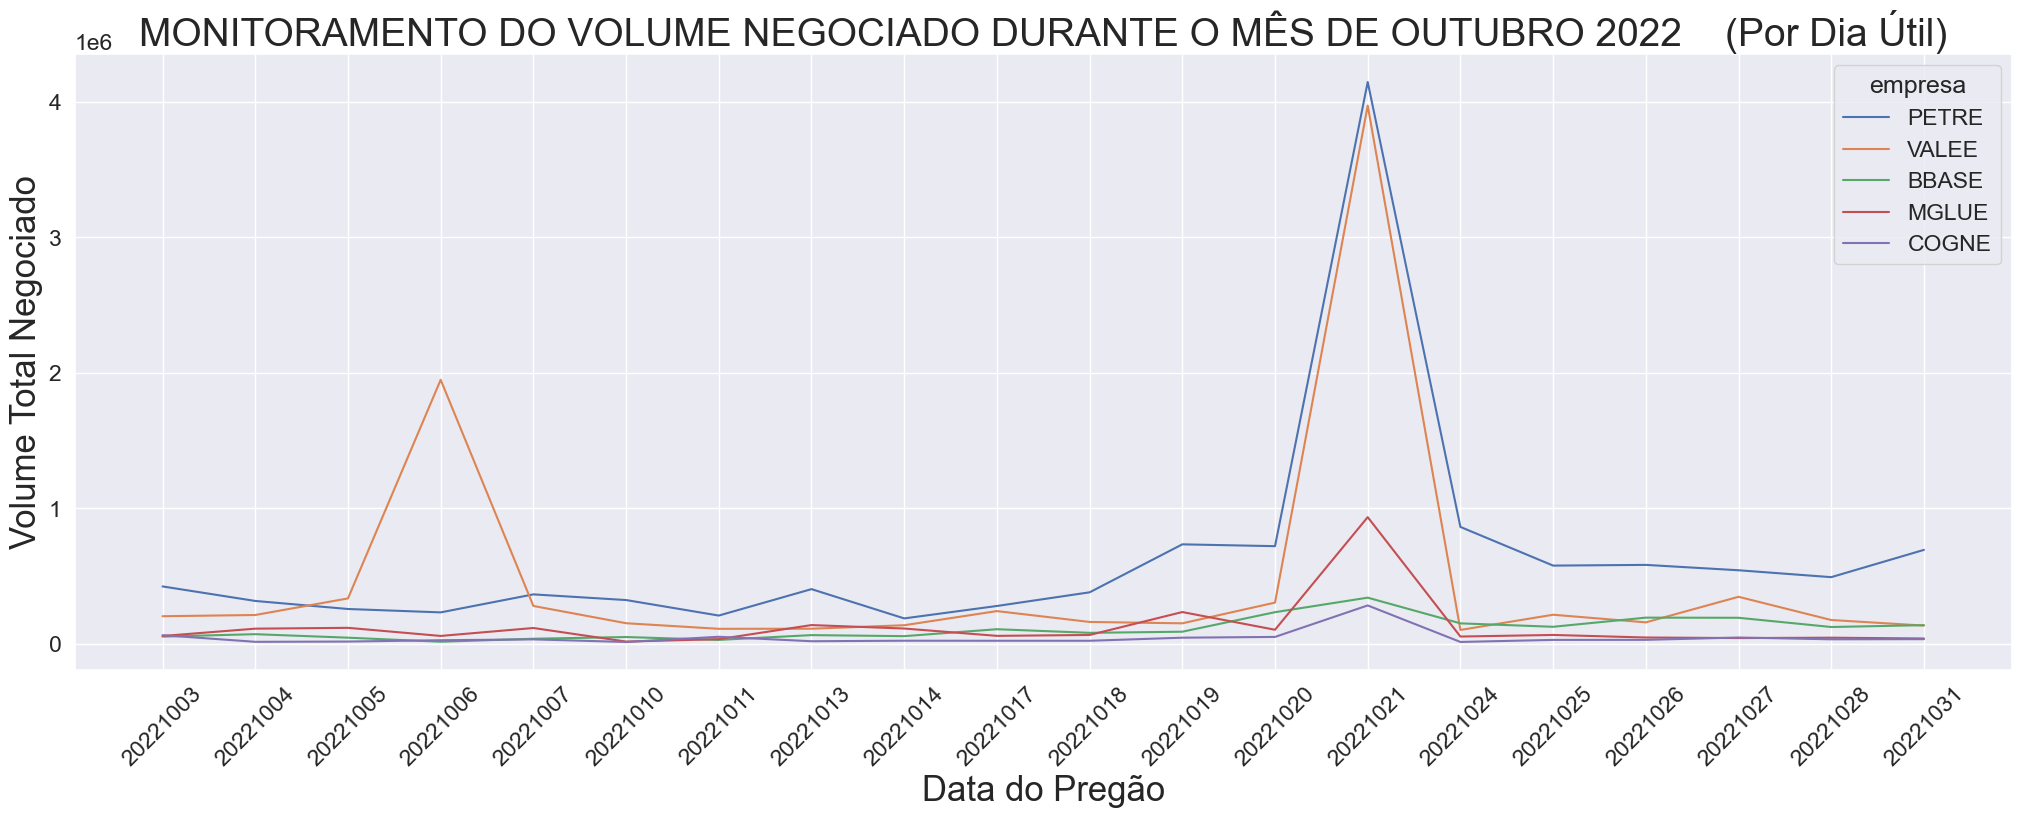

In [76]:
plt.figure(figsize=(25,8))
sns.set(font_scale=1.5)
plt.xticks(rotation=45)
sns.lineplot(data=empresas, x="data_pregao", y="volume_total_negociado", hue="empresa", err_style=None)

plt.xlabel('Data do Pregão', fontsize = 25)
plt.ylabel('Volume Total Negociado',fontsize = 25)
plt.title("MONITORAMENTO DO VOLUME NEGOCIADO DURANTE O MÊS DE OUTUBRO 2022    (Por Dia Útil)", fontsize = 28)

Text(0.5, 1.0, 'Monitoramento dos Negócios Pelo Preço')

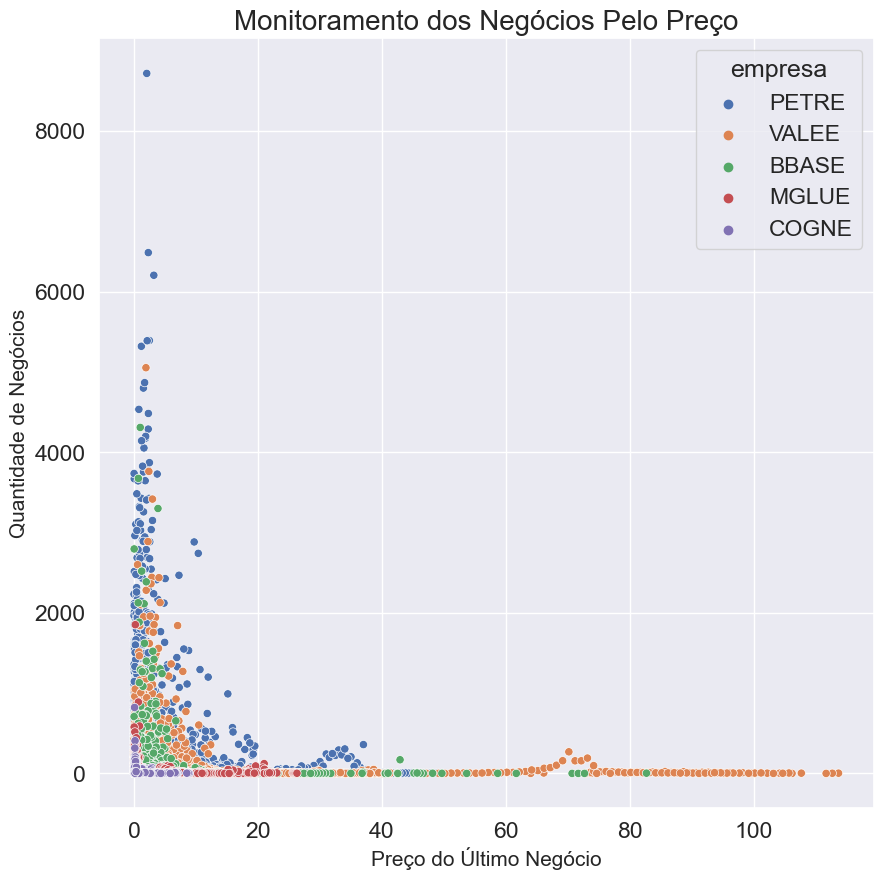

In [77]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=empresas, x='preco_ultimo_negocio', y='numero_negocios', hue="empresa")
plt.xlabel('Preço do Último Negócio', fontsize = 15)
plt.ylabel('Quantidade de Negócios',fontsize = 15)
plt.title("Monitoramento dos Negócios Pelo Preço", fontsize = 20)

In [78]:
fig = px.scatter(empresas, x = 'numero_negocios', y = 'preco_maximo', color = 'empresa', hover_name = "empresa", log_x = True, width = 800)
fig.update_traces(marker=dict(size = 10,line = dict(width = 1)),selector=dict(mode = 'markers'))
fig.update_layout(title = 'ANÁLISE DO Nº DE NEGÓCIOS VS PREÇO MÁXIMO')
fig.update_xaxes(title = 'Nº de Negócios')
fig.update_yaxes(title = 'Preço Máximo')
fig.show()

In [79]:
empresas_lite = empresas[["data_pregao", "empresa", "preco_abertura", "preco_maximo", "quantidade_papeis_negociados", "volume_total_negociado" ]]

In [80]:
empresas_lite['quantidade_papeis_negociados'].unique()

array([7.0000e+03, 5.0000e+02, 1.1000e+03, ..., 1.3029e+06, 8.2920e+05,
       3.9340e+05])

In [81]:
emp1 = empresas_lite.loc[(empresas_lite['empresa'] == 'PETRE') & (empresas_lite['preco_maximo'] == 49.77)]
emp2 = empresas_lite.loc[(empresas_lite['empresa'] == 'VALEE') & (empresas_lite['preco_maximo'] == 113.66)]
emp3 = empresas_lite.loc[(empresas_lite['empresa'] == 'BBASE') & (empresas_lite['preco_maximo'] > 80)]
emp4 = empresas_lite.loc[(empresas_lite['empresa'] == 'MGLUE') & (empresas_lite['preco_maximo'] > 26.20)]

In [82]:
list = []
for value in empresas_lite.columns.values:
    list.append(value)

In [83]:
df = pd.DataFrame(emp1, columns = list)

In [84]:
dff = pd.concat([emp1, emp2, emp3, emp4])

# - K-means (Algoritmo de Lloyd Max)

In [85]:
#import k-means module to work with
from sklearn.cluster import KMeans

## -- Comparing Last Price with Number of Trades

### + Company: Petrobrás

#### > Ellbow Method to determine the number of clusters

In [86]:
df_group = empresa_1[['preco_ultimo_negocio', 'numero_negocios']]

<AxesSubplot:>

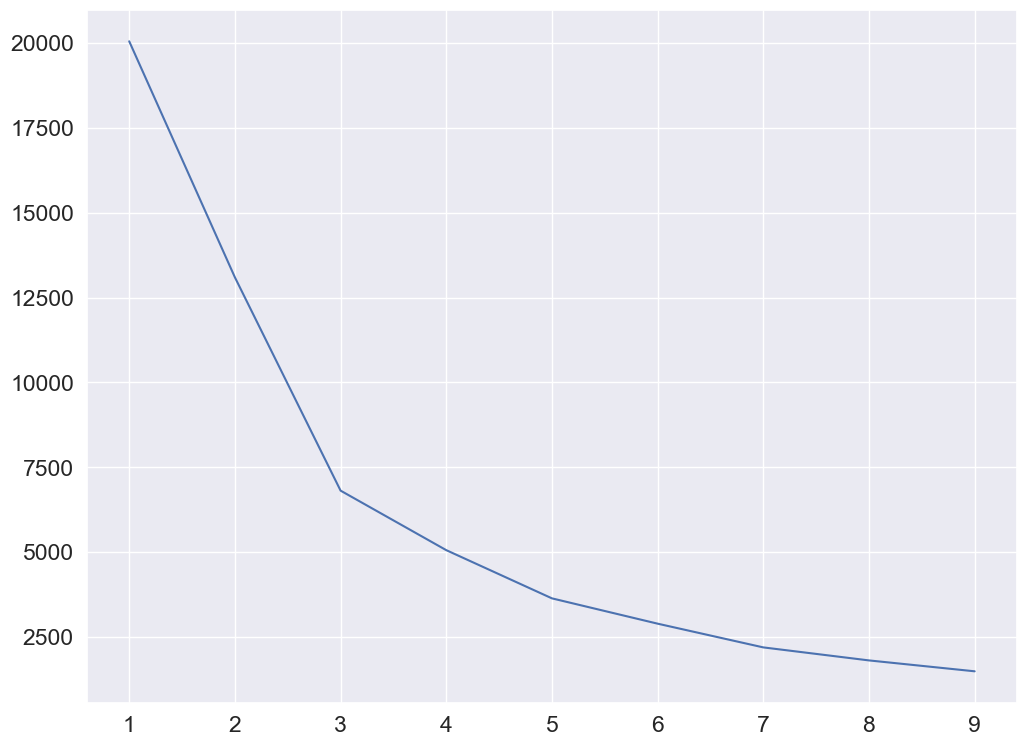

In [87]:
disps = []
scaler_object = StandardScaler()
df_group_elb = scaler_object.fit_transform(df_group)
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_group_elb)
    disps.append(kmeans.inertia_)
sns.lineplot(x=range(1,10), y=disps)

### > Separate the dataset into groups

In [88]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_group)

KMeans(n_clusters=5)

<AxesSubplot:xlabel='preco_ultimo_negocio', ylabel='numero_negocios'>

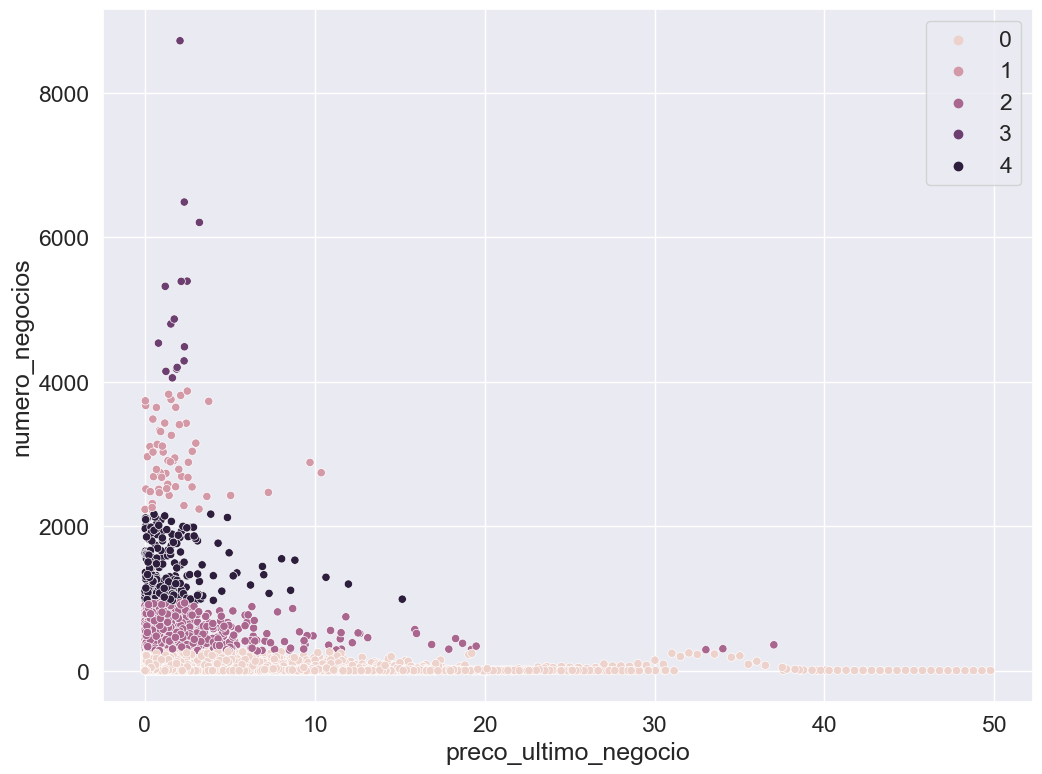

In [89]:
sns.scatterplot(data=df_group, x='preco_ultimo_negocio', y='numero_negocios', hue=kmeans.labels_)

### + Company: Cogna

<AxesSubplot:>

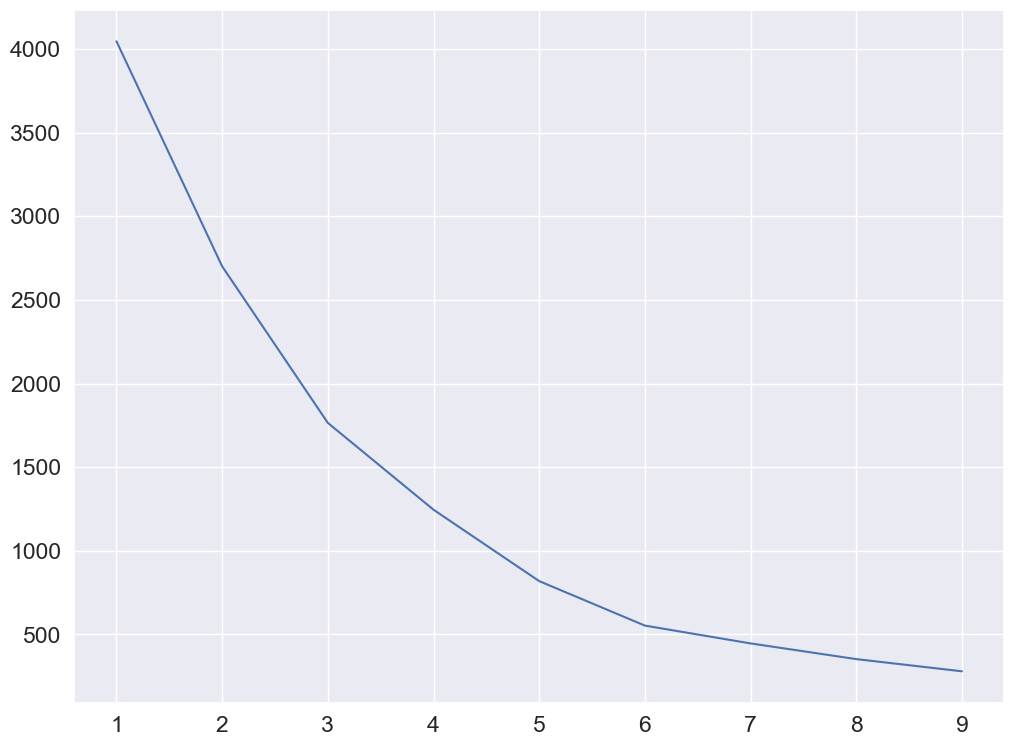

In [91]:
df2_group = empresa_5[['preco_ultimo_negocio', 'numero_negocios']]
disps = []
scaler_object = StandardScaler()
df2_group_elb = scaler_object.fit_transform(df2_group)
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df2_group_elb)
    disps.append(kmeans.inertia_)
sns.lineplot(x=range(1,10), y=disps)

<AxesSubplot:xlabel='preco_ultimo_negocio', ylabel='numero_negocios'>

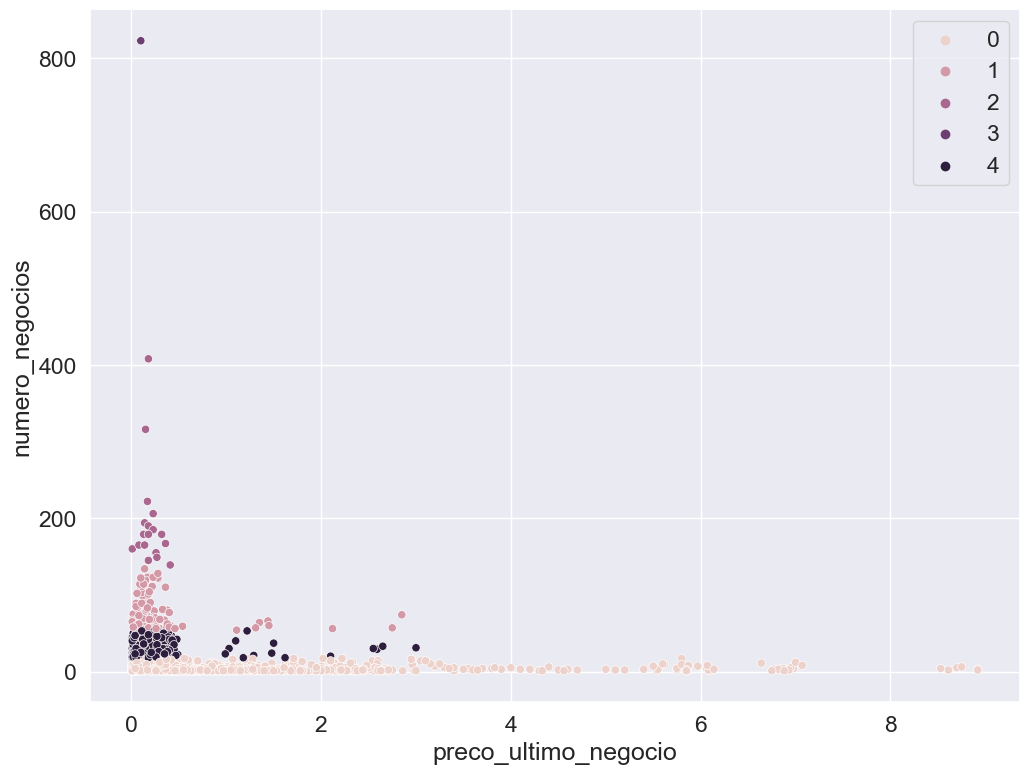

In [92]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df2_group)
sns.scatterplot(data=df2_group, x='preco_ultimo_negocio', y='numero_negocios', hue=kmeans.labels_)

## -- Comparing Total Trading Volume with Opening Price

### + Company: Petrobrás

<AxesSubplot:>

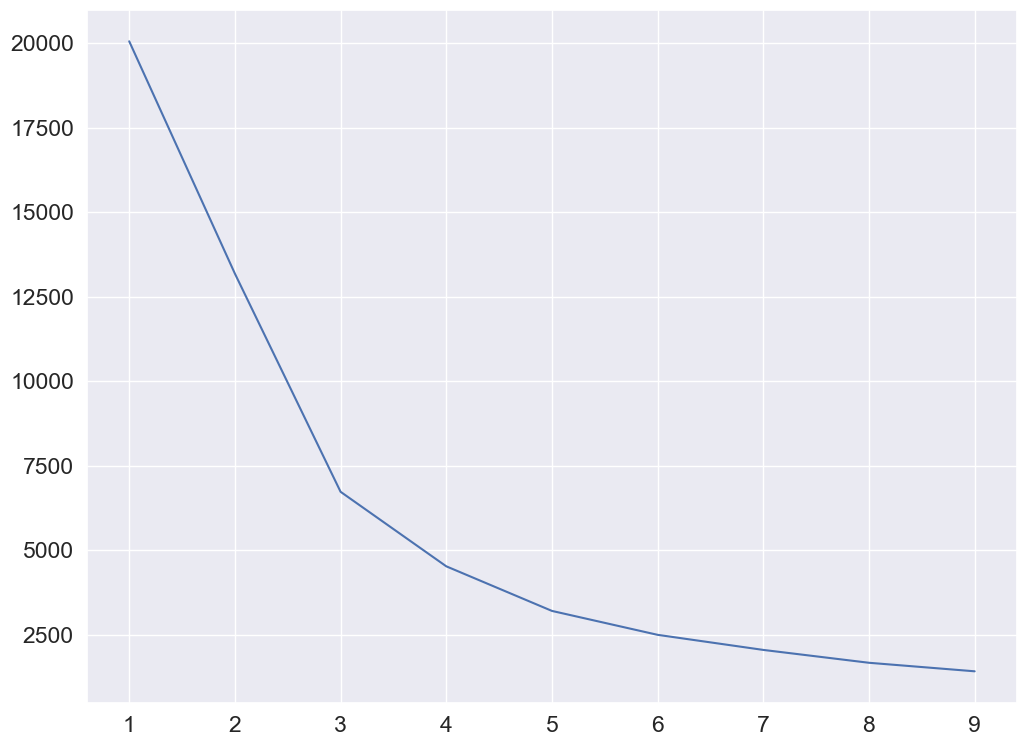

In [93]:
df_group_comparing2 = empresa_1[['volume_total_negociado', 'preco_abertura']]
disps = []
scaler_object = StandardScaler()
df_group_elb_2 = scaler_object.fit_transform(df_group_comparing2)
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_group_elb_2)
    disps.append(kmeans.inertia_)
sns.lineplot(x=range(1,10), y=disps)

<AxesSubplot:xlabel='volume_total_negociado', ylabel='preco_abertura'>

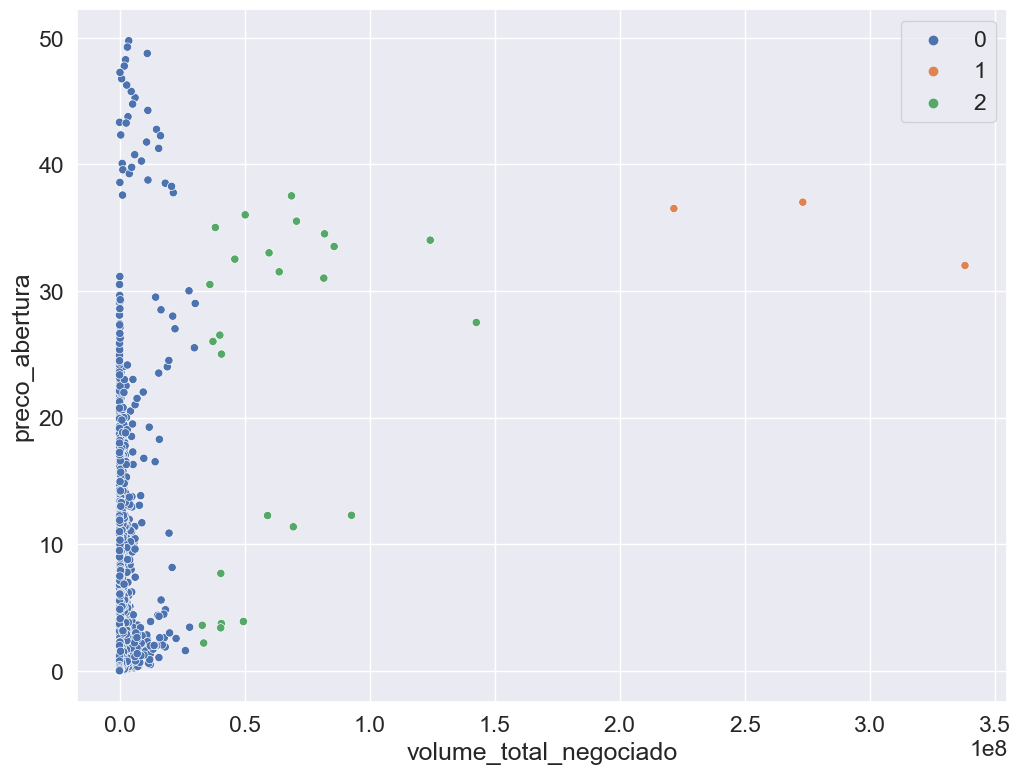

In [94]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_group_comparing2)
sns.scatterplot(data=df_group_comparing2, x='volume_total_negociado', y='preco_abertura', hue=kmeans.labels_, palette="deep")

### + Company: Cogna

<AxesSubplot:>

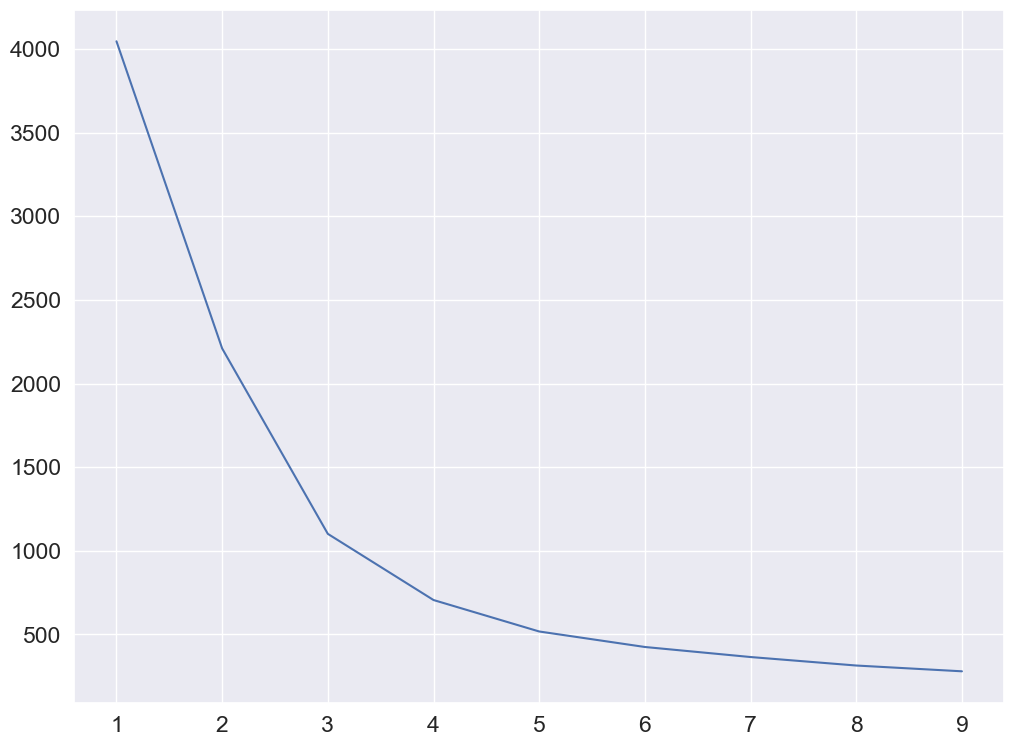

In [95]:
df2_group_comparing2 = empresa_5[['volume_total_negociado', 'preco_abertura']]
disps = []
scaler_object = StandardScaler()
df2_group_elb_2 = scaler_object.fit_transform(df2_group_comparing2)
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df2_group_elb_2)
    disps.append(kmeans.inertia_)
sns.lineplot(x=range(1,10), y=disps)

<AxesSubplot:xlabel='volume_total_negociado', ylabel='preco_abertura'>

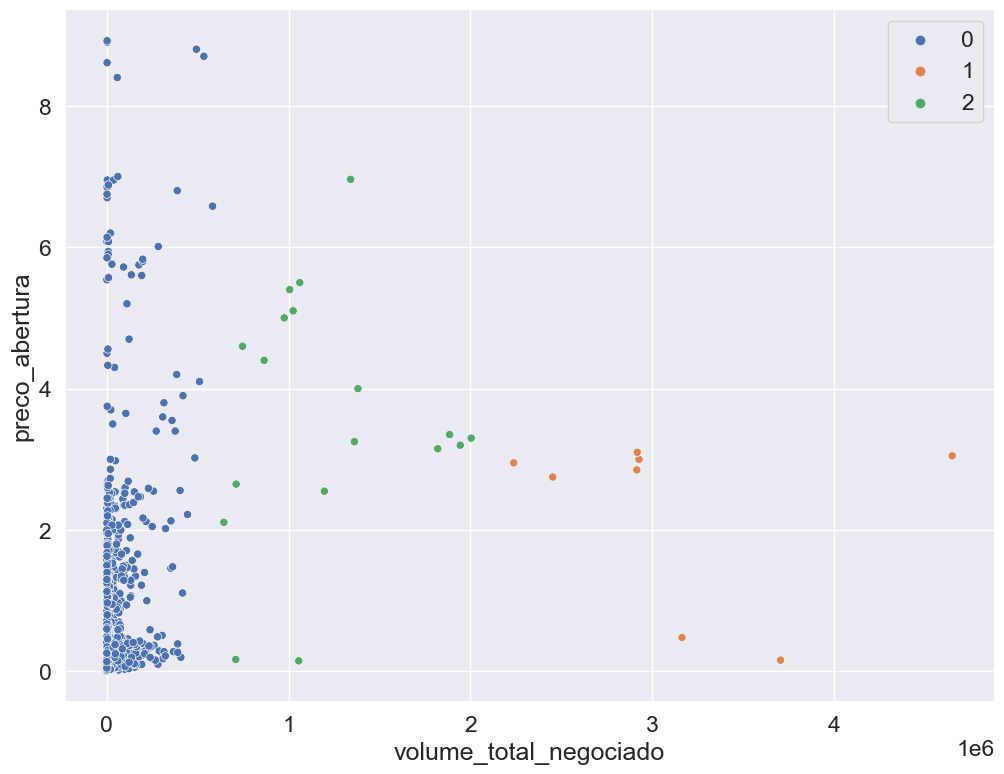

In [96]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df2_group_comparing2)
sns.scatterplot(data=df2_group_comparing2, x='volume_total_negociado', y='preco_abertura', hue=kmeans.labels_, palette="deep")

#### Algum padrão foi dectado?

#### Alguma nova pergunta foi descoberta ao analisar os agrupamentos?